In [23]:
# essentials
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import os

import tensorflow as tf

import config
from utils.DataGenerator import DataGenerator

## Loading models and vocabulary

In [24]:
model = tf.keras.models.load_model(config.MODEL_DIR + "model-acc17-loss5.57.h5")

In [25]:
with open(os.path.join(config.MODEL_DIR, "vocabulary.pkl"), 'rb') as file:
    vocabulary = pickle.load(file)

with open("trained_models/word2vecs/whole-dataset-win7-vec200-min20.pkl", 'rb') as file:
    word2vec = pickle.load(file)

with open(os.path.join(config.MODEL_DIR, "training_logs.pkl"), 'rb') as file:
    training_logs = pickle.load(file)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-28 18:27:26         2463
metadata.json                                  2023-04-28 18:27:26           64
variables.h5                                   2023-04-28 18:27:26      5013616
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


<function IPython.core.display_functions.clear_output(wait=False)>

## Learning curve

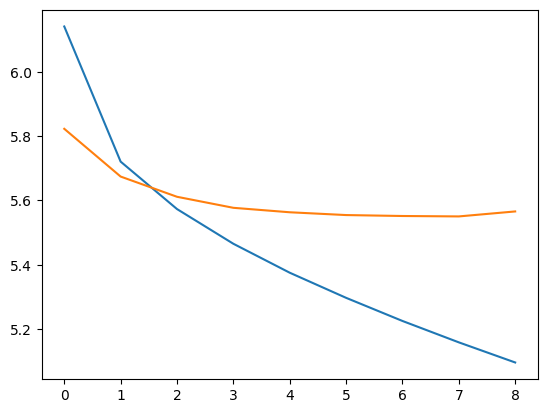

In [26]:
# due to early stopping executed epochs might be different
executed_epochs = len(training_logs.history["loss"])

plt.plot(range(executed_epochs), training_logs.history["loss"])
plt.plot(range(executed_epochs), training_logs.history["val_loss"])

## Evaluation 

In [27]:
reviews_df = pd.read_csv("data/reviews_cleaned_sample.csv", converters={'tokenized': pd.eval})

In [28]:
sample_index = 1

sample_reviews = reviews_df.tokenized.iloc[sample_index:sample_index+2]

In [29]:
data_gen = DataGenerator(sample_reviews, vocabulary=vocabulary)

In [30]:
X_words, y_words = data_gen.create_dataset(config.PREVIOUS_WORDS_CONSIDERED)
embedded_words = data_gen.vectorize(X_words, word2vec, input_size=(config.PREVIOUS_WORDS_CONSIDERED, config.VECTOR_SIZE))

In [31]:
y_preds = model.predict(embedded_words, verbose=0)

num_proposed_words = 5
vocabulary_size = len(vocabulary)

In [32]:
pwc_and_predicted = []

for index in range(len(X_words)):
    y_pred = y_preds[index]

    predicted_indices = np.argsort(y_pred).reshape(vocabulary_size)[-num_proposed_words:]
    probabilities = np.sort(y_pred).reshape(vocabulary_size)[-num_proposed_words:]

    predicted_probability = {vocabulary[index]: prob for index, prob in zip(predicted_indices, probabilities)}
    
    pwc_and_predicted.append((X_words[index], y_words[index], predicted_probability))

In [33]:
pwc_and_predicted_sample = pwc_and_predicted[3:8]

for tokens, _, predicted_words in pwc_and_predicted_sample:
    text = " ".join(tokens)

    print(text + "...")
    print("PREDICTED:")

    for word, probability in predicted_words.items():
        print("       {: >20}: {}%".format(word, int(probability*100)))

    print()

of the general public actually...
PREDICTED:
                         of: 87%
                         as: 92%
                          a: 93%
                        the: 94%
                         is: 94%

the general public actually more...
PREDICTED:
                         as: 90%
                interesting: 91%
                         to: 94%
                         of: 97%
                       than: 99%

general public actually more important...
PREDICTED:
                       this: 88%
                          a: 89%
                         to: 94%
                       than: 95%
                        the: 97%

public actually more important than...
PREDICTED:
                       most: 94%
                       that: 96%
                          a: 97%
                       this: 98%
                        the: 99%

of all ages the following...
PREDICTED:
                          i: 84%
                       this: 86%
                         is: 87%
  